# 이해를 위한 정리

* $AQ = F$
* $Q = A^{-1}F$
* $A^TAQ = A^TF  \to Q = (A^TA)^{-1}A^TF$
* $\alpha Q_\alpha + A^TAQ_\alpha = A^TF \to Q_\alpha = (\alpha I + A^TA)^{-1} A^TF$


---




 ## $Q_\alpha = (\alpha I + A^TA)^{-1} A^TF$

 or

 ## $Q_n = \frac{F_n}{\alpha e^{n^2T} + e^{-n^2T}}, \quad\quad n = 1, 2, \cdots , N$



```
invA = np.diag(1/(alpha*np.exp((np.arange(1, N+1))**2*T)+np.exp(-(np.arange(1, N+1))**2*T)))
hatQ = invA@F
```



# Generate Data 


*   generate_Q
*   sol_act
*   noise_data
*   sol_Tik
*   result_gen_data
*   result_Lcurve



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

T = 1
delta = 0.01
N = 5
M = 1

In [3]:
def generate_Q(N,  M, tau):
    ii = 0
    tore = tau*np.sqrt(2/np.pi)
    Q = []
    while ii < M:
        tempQ = 2*tore*np.random.rand(N) - tore
        tempQ = np.array(tempQ)
        if np.linalg.norm(tempQ) <= tore:
            Q = np.append(Q, tempQ)
            ii += 1
    return (Q.reshape(-1, N))

def sol_act(Q, T):
    N = len(Q[0])
    A = np.diag(np.exp(-(np.arange(1, N+1))**2*T))
    F = A@Q.T #A = NxN, Q = MxN, Q.T = NxM , F = NxM
    return F

def noise_data(F, delta):
    e = 2*np.random.rand(len(F[:,0]), len(F[0])) - 1
    N = len(F[:])
    for m in range(len(F[0])):
        norm = np.linalg.norm(F[:,m])
        e[:, m] = e[:, 0]*norm*delta
    nF = F+e
    return nF

def sol_Tik(alpha, T, F):
    N = len(F[:])
    invA = np.diag(1/(alpha*np.exp((np.arange(1, N+1))**2*T)+np.exp(-(np.arange(1, N+1))**2*T))) # A = NxN
    hatQ = invA@F 
    return hatQ

def result_gen_data(N, M, tau, Q, delta):
    #Q = generate_Q(N, M, tau)
    T = 1
    F = sol_act(Q, T)
    nF = noise_data(F, delta)
    np.savetxt('Q.txt', Q.T, fmt='%8f', delimiter = ',', header='')
    np.savetxt('F.txt', F, fmt='%8f', delimiter = ',', header='')
    np.savetxt('nF.txt', nF, fmt='%8f', delimiter = ',', header='')

In [4]:
Q = generate_Q(N, M, tau = 1)
F = sol_act(Q, T)
nF = noise_data(F, delta)
result_gen_data(N, M, tau = 1, Q = Q, delta = 0.01)
Q

array([[ 0.28780564, -0.15721741, -0.16575961,  0.13168786,  0.23606265]])

In [5]:
def result_Lcurve(N, tau, delta, min_al):
    #get data
    M = 1 #one data set
    Q = generate_Q(N, M, tau)
    
    T = 1
    F = sol_act(Q, T)
    nF = noise_data(F, delta)
    
    al = np.linspace(0, min_al, 100)
    q1 = []
    q2 = []
    for ii in range(len(al)):
        q1.append(sol_Tik(10**al[ii], T, F))
        q2.append(sol_Tik(10**al[ii], T, nF))
    q1 = np.array(q1) 
    q2 = np.array(q2)
    
    n = np.arange(1, N+1)
    A = np.diag(np.exp(-n**2*T))
    
    x1 = []
    x2 = []
    y1 = []
    y2 = []

    for i in range(len(al)):
        x1.append(np.linalg.norm(A@q1[i]-F))
        y1.append(np.linalg.norm(q1[i]))
        x2.append(np.linalg.norm(A@q2[i]-nF))
        y2.append(np.linalg.norm(q2[i]))
    
    fig = plt.figure(figsize = (10,10))
    fig.add_subplot(2, 1, 1)
    plt.xscale("log")
    plt.yscale("log")
    #plt.xlabel("$\||Aq-F\||$")
    plt.plot(x1, y1)
    plt.title("without noise")

    
    fig.add_subplot(2, 1, 2)
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(x2, y2)
    plt.title("with noise")     

    
    plt.savefig('L-curve1')
    return np.flip(np.array(x1)), np.flip(np.array(y1)), np.flip(np.array(x2)), np.flip(np.array(y2))

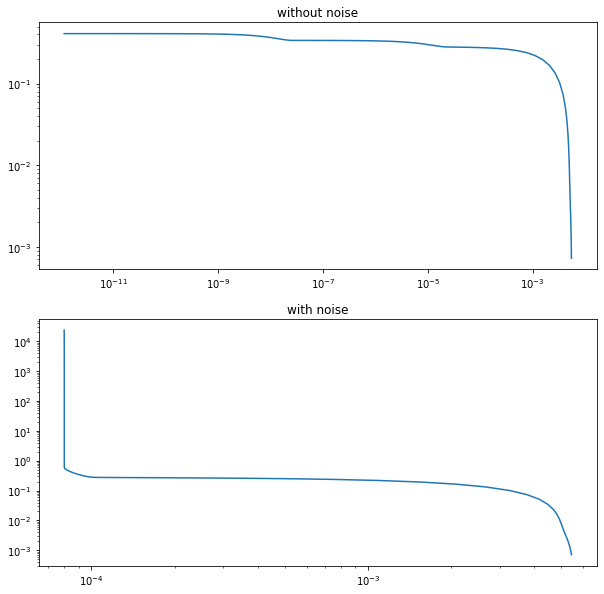

In [6]:
x1, y1, x2, y2 = result_Lcurve(10, 1, 0.01, -20)

* Find corner of L-curve

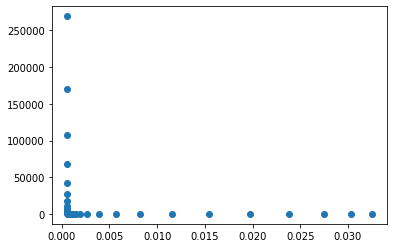

In [6]:
plt.rcParams["figure.figsize"] = (6,4)
plt.scatter(x2, y2)


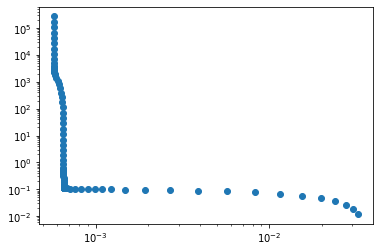

In [7]:
plt.rcParams["figure.figsize"] = (6,4)
plt.scatter(x2, y2)
plt.xscale("log")
plt.yscale("log")

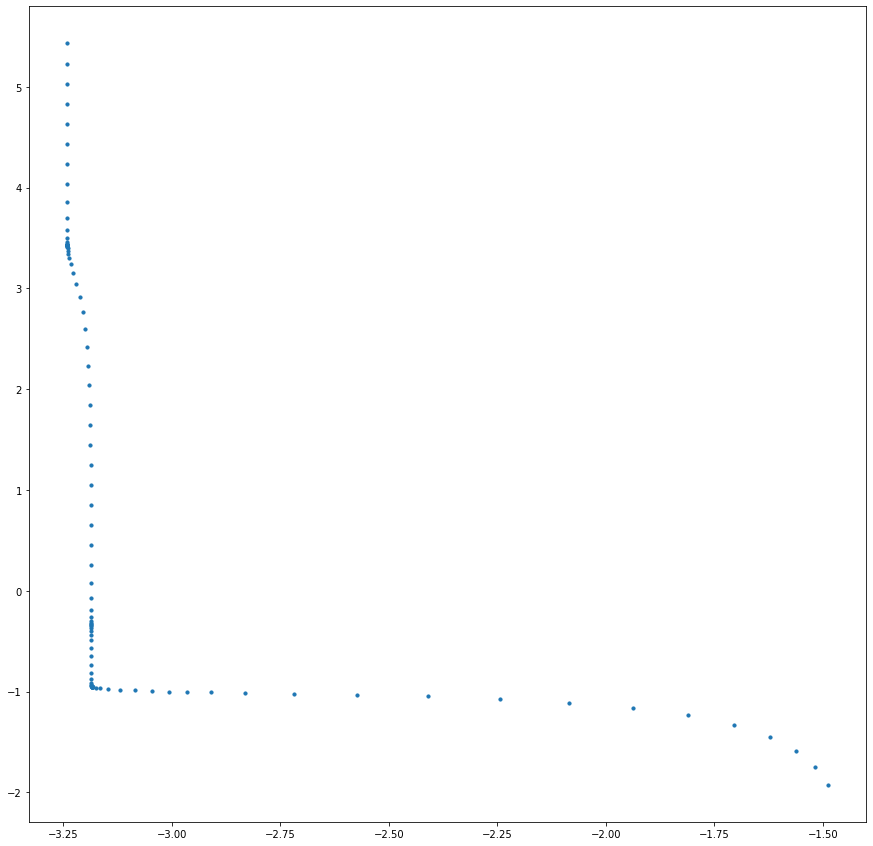

In [8]:
log_x2 = np.log10(x2)
log_y2 = np.log10(y2)
plt.rcParams["figure.figsize"] = (15,15)
plt.scatter(log_x2, log_y2, s = 10)


plt.savefig("log_x2")

### 동일한 linspace로 자른 후 cos 값 구하기 --> 정밀성이 너무 떨어짐

In [9]:
T = 1
Q = [-0.20246986, -0.21417431, -0.43702449, -0.45168872,  0.27545179]
F = sol_act(Q, T)

al = np.linspace(0, min_al, 100)
    q1 = []
    q2 = []
    for ii in range(len(al)):
        q1.append(sol_Tik(10**al[ii], T, F))
        q2.append(sol_Tik(10**al[ii], T, nF))
    q1 = np.array(q1) 
    q2 = np.array(q2)
    
    n = np.arange(1, N+1)
    A = np.diag(np.exp(-n**2*T))
    
    x1 = []
    x2 = []
    y1 = []
    y2 = []

    for i in range(len(al)):
        x1.append(np.linalg.norm(A@q1[i]-F))
        y1.append(np.linalg.norm(q1[i]))
        x2.append(np.linalg.norm(A@q2[i]-nF))
        y2.append(np.linalg.norm(q2[i]))
        
    x1 = np.flip(np.array(x1)) 
    y1 = np.flip(np.array(y1)) 
    x2 = np.flip(np.array(x2)) 
    y2 = np.flip(np.array(y2))    


## v[i]$\bullet$v[i+k] 사용하여 cos 구하기

In [21]:
def find_best_idx(log_x2, log_y2):
    O = np.column_stack((log_x2, log_y2))
    v = []
    k = 10
    for i in range(len(O) - 1 - k):
        v.append(O[i+k]-O[i])
    v

    cos = []

    for i in range(len(v)-1-k):
        v1_norm = np.linalg.norm(v[i])
        v2_norm = np.linalg.norm(v[i+k])
        v_cos = np.dot(v[i], v[i+k])/(v1_norm*v2_norm)
        cos.append(v_cos)
    a = np.argmin(cos) + k
    return a   

In [22]:
a = find_best_idx(log_x2, log_y2)
al = np.linspace(0, -20, 100)
alpha = 10**al[a]
alpha

7.05480231071866e-16

In [25]:
# 모든 Q의 데이터 (M개)에 대하여 alpha값 뽑아내기 !!!!

array([[ 0.43643866, -0.21227163,  0.16030671, -0.04246617, -0.07791579],
       [ 0.06669045,  0.02980045,  0.42346725,  0.1465251 , -0.60665306],
       [-0.51183298,  0.29135159,  0.2209332 , -0.05636336, -0.21676022],
       ...,
       [-0.24330259,  0.07801745, -0.33276529,  0.06391149,  0.45519362],
       [-0.25026278, -0.06909089, -0.07615394, -0.57732413, -0.47946228],
       [ 0.43710765, -0.35372984,  0.16279636, -0.15957175,  0.15788423]])

In [12]:
hatQ = sol_Tik(alpha, T, F)
nF = noise_data(F, delta = delta)

np.savetxt('hatQ.txt', hatQ, fmt='%8f', delimiter = ',', header='')

In [13]:
arr = []
for i in range(M):
    arr.append(i+1)

In [14]:
#load data
#column name에 data가 들어가있기 때문에 "names = arr" 로 처리해 줍니다. arr은 1 ~ len(F)의 숫자가 담겨있습니다.
dataF = pd.read_csv('C:/Users/Administrator/F.txt', sep = ',', names = arr)
#dataQ = pd.read_csv('C:/Users/Administrator/Q.txt', sep = ',', names = arr).to_numpy().T
dataQ = pd.read_csv('C:/Users/Administrator/hatQ.txt', sep = ',', names = arr)
data_nF = pd.read_csv('C:/Users/Administrator/nF.txt', sep = ',', names = arr)

In [15]:
def make_arr(A):
    arA = []
    for j in range(len(A.iloc[0, :])):
        arA1 = []
        for i in range(len(A.iloc[:,0])):
            tmpA = A.iloc[:,j][i]
            arA1.append(tmpA)
        arA.append(arA1)
    return arA

#make array
arrF = make_arr(dataF)
dataF = np.array(arrF)

arrQ = make_arr(dataQ)
dataQ = np.array(arrQ)

arr_nF = make_arr(data_nF)
data_nF = np.array(arr_nF)

In [16]:
import math
train_size = math.floor(len(dataF)*0.6) # train : 60%
val_size = math.floor(len(dataF)*0.2) #val : 20%
test_size = math.floor(len(dataF)*0.2) #test : 20%
#generate F_data, F_val, F_test
F_data = dataF[:train_size, :]
F_val = dataF[train_size:(val_size + train_size), :]
F_test = dataF[(val_size + train_size):(val_size + train_size + test_size), :]

#generate Q_data, Q_val, Q_test
Q_data = dataQ[:train_size, :]
Q_val = dataQ[train_size:(val_size + train_size), :]
Q_test = dataQ[(val_size + train_size):(val_size + train_size + test_size), :]

#generate nF_data, nF_val, nF_test
nF_data = data_nF[:train_size, :]
nF_val = data_nF[train_size:(val_size + train_size), :]
nF_test = data_nF[(val_size + train_size):(val_size + train_size + test_size), :]

print(f'{F_data.shape}, {F_test.shape}, {F_val.shape}')
print(f'{Q_data.shape}, {Q_test.shape}, {Q_val.shape}')
print(f'{nF_data.shape}, {nF_test.shape}, {nF_val.shape}')

(60000, 5), (20000, 5), (20000, 5)
(60000, 5), (20000, 5), (20000, 5)
(60000, 5), (20000, 5), (20000, 5)


In [17]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential() #Sequential

model.add(keras.layers.Dense(input_dim = N, units = 10, activation= "tanh",kernel_initializer ="HeNormal" )) 
model.add(keras.layers.Dense(20, activation= "tanh")) 
model.add(keras.layers.Dense(50, activation= "tanh"))  
model.add(keras.layers.Dense(100, activation= "tanh")) 
model.add(keras.layers.Dense(120, activation= "tanh")) 
model.add(keras.layers.Dense(50, activation= "tanh"))
model.add(keras.layers.Dense(N, activation= "tanh"))

In [18]:
with tf.device('/GPU:0'):
    F_train = tf.constant(F_data)
    Q_train = tf.constant(Q_data)
    nF_train = tf.constant(nF_data)
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

In [19]:
start_vect=time.time()

model.compile(loss = "mse",
              optimizer = "ADAM",
              metrics = ["accuracy"])
history = model.fit(x = F_train, y = Q_train, validation_data=(F_val, Q_val),epochs = 500)


print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

Epoch 1/500
   1/1875 [..............................] - ETA: 0s - loss: 0.0733 - accuracy: 0.2188

W1118 04:44:36.118689 18500 callbacks.py:325] Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0000s vs `on_train_batch_end` time: 0.0010s). Check your callbacks.


1875/1875 [==============================] - 1s 526us/step - loss: 0.0353 - accuracy: 0.5535 - val_loss: 0.0346 - val_accuracy: 0.5652
Epoch 2/500
1875/1875 [==============================] - 1s 477us/step - loss: 0.0348 - accuracy: 0.5575 - val_loss: 0.0346 - val_accuracy: 0.5669
Epoch 3/500
1875/1875 [==============================] - 1s 464us/step - loss: 0.0347 - accuracy: 0.5601 - val_loss: 0.0346 - val_accuracy: 0.5557
Epoch 4/500
1875/1875 [==============================] - 1s 461us/step - loss: 0.0347 - accuracy: 0.5551 - val_loss: 0.0346 - val_accuracy: 0.5666
Epoch 5/500
1875/1875 [==============================] - 1s 470us/step - loss: 0.0347 - accuracy: 0.5563 - val_loss: 0.0345 - val_accuracy: 0.5652
Epoch 6/500
1875/1875 [==============================] - 1s 466us/step - loss: 0.0346 - accuracy: 0.5570 - val_loss: 0.0349 - val_accuracy: 0.5485
Epoch 7/500
1875/1875 [==============================] - 1s 468us/step - loss: 0.0295 - accuracy: 0.6188 - val_loss: 0.0255 - val_

1875/1875 [==============================] - 1s 470us/step - loss: 0.0165 - accuracy: 0.7654 - val_loss: 0.0165 - val_accuracy: 0.7625
Epoch 112/500
1875/1875 [==============================] - 1s 479us/step - loss: 0.0165 - accuracy: 0.7649 - val_loss: 0.0164 - val_accuracy: 0.7658
Epoch 113/500
1875/1875 [==============================] - 1s 469us/step - loss: 0.0165 - accuracy: 0.7643 - val_loss: 0.0164 - val_accuracy: 0.7678
Epoch 114/500
1875/1875 [==============================] - 1s 467us/step - loss: 0.0165 - accuracy: 0.7648 - val_loss: 0.0165 - val_accuracy: 0.7638
Epoch 115/500
1875/1875 [==============================] - 1s 473us/step - loss: 0.0165 - accuracy: 0.7645 - val_loss: 0.0165 - val_accuracy: 0.7613
Epoch 116/500
1875/1875 [==============================] - 1s 491us/step - loss: 0.0165 - accuracy: 0.7645 - val_loss: 0.0164 - val_accuracy: 0.7694
Epoch 117/500
1875/1875 [==============================] - 1s 488us/step - loss: 0.0165 - accuracy: 0.7651 - val_loss: 0

KeyboardInterrupt: 